In [1]:
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/nlp_class/all_book_titles.txt


--2024-03-12 13:20:54--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/nlp_class/all_book_titles.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 127992 (125K) [text/plain]
Saving to: 'all_book_titles.txt'

     0K .......... .......... .......... .......... .......... 40% 1,31M 0s
    50K .......... .......... .......... .......... .......... 80% 19,5M 0s
   100K .......... .......... ....                            100% 9,16M=0,04s

2024-03-12 13:20:54 (2,88 MB/s) - 'all_book_titles.txt' saved [127992/127992]



In [2]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\patri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\patri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
wordnet_lemmatizer = WordNetLemmatizer()

In [5]:
titles = [line.rstrip() for line in open('all_book_titles.txt')]


In [6]:
stops = set(stopwords.words('english'))

In [7]:
# great example of domain-specific stopwords
stops = stops.union({
  'introduction', 'edition', 'series', 'application',
  'approach', 'card', 'access', 'package', 'plus', 'etext',
  'brief', 'vol', 'fundamental', 'guide', 'essential', 'printed',
  'third', 'second', 'fourth', 'volume'})

In [8]:
stops = list(stops)

In [9]:
def my_tokenizer(s):
  # downcase
  s = s.lower()

  # split string into words (tokens)
  tokens = nltk.tokenize.word_tokenize(s)

  # remove short words, they're probably not useful
  tokens = [t for t in tokens if len(t) > 2]

  # put words into base form
  tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]

  # remove stopwords
  tokens = [t for t in tokens if t not in stops]

  # remove any digits, i.e. "3rd edition"
  tokens = [t for t in tokens if not any(c.isdigit() for c in t)]

  return tokens

In [10]:
vectorizer = CountVectorizer(binary=True, tokenizer=my_tokenizer)

In [11]:
X = vectorizer.fit_transform(titles)

C:\Users\patri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [12]:
index_word_map = vectorizer.get_feature_names_out()
# create index > word map for plotting later

# conceptually what we want to do
# index_word_map = [None] * len(vectorizer.vocabulary_)
# for word, index in vectorizer.vocabulary_.items():
#   index_word_map[index] = word

# but it's already stored in the count vectorizer

In [13]:
# transpose X to make rows = terms, cols = documents
X = X.T

In [14]:
svd = TruncatedSVD()
Z = svd.fit_transform(X)

In [15]:
!pip install plotly

In [16]:
import plotly.express as px

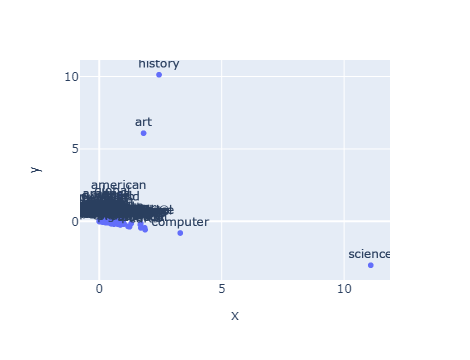

In [18]:
fig = px.scatter(x=Z[:,0], y=Z[:,1], text=index_word_map, size_max=60)
fig.update_traces(textposition='top center')
fig.show()